This project explanes how to construct yield curve from actual bond data. And how to construct spot curve using bootstrapping and interpolate technique. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import fsolve
from numpy import linalg as la
import scipy as sp
from scipy.interpolate import interp1d
bonds = pd.read_csv(r'C:\Users\Trevor\OneDrive\Desktop\q2data.csv').values.transpose()
coupon = [1.5, 1.5, 0.25, 0.25, 1.5, 2.25, 1.5, 1.25, 0.5, 0.25]
ttm = [6, 12, 18, 24, 28, 37, 43, 49, 55, 61]
bonds

In [36]:
bonds_dirty = []
for i in range(1,6):
    sub = []
    j = 0
    b = bonds[i-1]
    while j != 10:
        if ttm[j] % 6 == 0:
            d = b[j] + coupon[j]*(1/2 - (12+i)/365)
        else: 
            ai = (((j+1)*6 - ttm[j])/12 - (12+i)/365)*coupon[j]
            d = b[j] + ai
        sub.append(round(d,3))
        j += 1
    bonds_dirty.append(sub)
for i in range(1,6):
    sub = []
    j = 0
    b = bonds[i+4]
    while j != 10:
        if ttm[j] % 6 == 0:
            d = b[j] + coupon[j]*(1/2 - (6-i)/365)
        else: 
            ai = (((j+1)*6 - ttm[j])/12 - (6-i)/365)*coupon[j]
            d =b[j] + ai
        sub.append(round(d,3))
        j += 1
    bonds_dirty.append(sub)
bd = np.transpose(bonds_dirty)

In [39]:
normal = []
for i in range(4):
    sub = []
    for p in bd[i]:
        cp = coupon[i]/2
        func = lambda r: p - sum(np.array([(cp)/((1+(r/2))**(m)) for m in range(0,i+2)])) - (100)/((1+(r/2))**(i+1))
        ytm = (optimize.newton(func, 0.0005))
        sub.append(ytm)
        if ytm < 0:
            print(cp)
            print(p)
            print(i+1)
    normal.append(sub) 

i = 4
sub = []
for p in bd[i]:
    cp = coupon[i]/2
    diff = ttm[i]/6 - i
    func = lambda r: p - sum(np.array([(cp)/((1+(r/2))**(m+diff)) for m in range(0,i+1)])) - (100)/((1+(r/2))**(i+1))
    ytm = (optimize.newton(func, 0.0005))
    sub.append(ytm)
normal.append(sub)
for i in range(5, 10):
    sub = []
    for p in bd[i]:
        cp = coupon[i]/2
        diff = ttm[i]/6 - (i + 1) 
        func = lambda r: p - sum(np.array([(cp)/((1+(r/2))**(m+diff)) for m in range(0,i+1)]))-(100)/((1+(r/2))**(ttm[i]/6))
        ytm = (optimize.newton(func, 0.0005))
        sub.append(ytm)
    normal.append(sub)
knormal = np.transpose(normal)
knormal
#np.savetxt('q4adata.csv', np.array(y), delimiter=',')

array([[0.00085396, 0.00111837, 0.00122511, 0.00189357, 0.00166294,
        0.00255779, 0.00317874, 0.00374183, 0.00432102, 0.00495778],
       [0.00115203, 0.00116789, 0.00129844, 0.00194866, 0.00164324,
        0.00257687, 0.00316492, 0.00374914, 0.00434752, 0.00497789],
       [0.00162912, 0.00150478, 0.0014985 , 0.00204885, 0.00181668,
        0.0027232 , 0.00325887, 0.00378325, 0.00439388, 0.00500001],
       [0.00190752, 0.00164355, 0.00150517, 0.00205386, 0.00187188,
        0.00280594, 0.00343581, 0.00398559, 0.00457505, 0.00520326],
       [0.00198708, 0.00168321, 0.00151184, 0.00205887, 0.00188766,
        0.00276138, 0.00330862, 0.00391975, 0.00446677, 0.00510261],
       [0.00121165, 0.00139577, 0.00158522, 0.00211398, 0.0018916 ,
        0.00268502, 0.00303511, 0.00362492, 0.00421068, 0.00482512],
       [0.00111228, 0.00134623, 0.00151851, 0.00206388, 0.00179302,
        0.00247512, 0.00310415, 0.00369067, 0.00429454, 0.00484522],
       [0.00103279, 0.00120752, 0.0013784

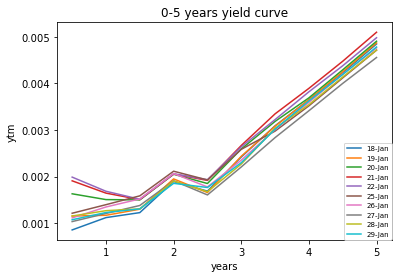

In [40]:
x = []
for k in ttm:
    x.append(k/12)
adjusted_ytm = []
for y in knormal:
    new_x = np.linspace(0.5, 5, 10)
    new_y = sp.interpolate.interp1d(x, y, kind='cubic')(new_x)
    adjusted_ytm.append(new_y)
date = ['18-Jan', '19-Jan', '20-Jan', '21-Jan', '22-Jan', '25-Jan', '26-Jan', '27-Jan', '28-Jan', '29-Jan']
time = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
i = 0
fig = plt.title('0-5 years yield curve')
for a in adjusted_ytm:
    plt.plot(time,a, label = date[i])
    i+= 1
plt.ylabel('ytm')
plt.xlabel('years')
plt.legend(loc='lower right', borderaxespad=0., fontsize = 7)
#plt.savefig("q4aytm.png")

In [71]:
spot = []
spot.append(normal[0])
for i in range(1, 4):
    sub = []
    cp = coupon[i]
    for j in range(10):
        p = bd[i][j]
        func = lambda r:sum(np.array([(cp)/(1+(spot[m][j]/2)**(m+1)) for m in range(i)])) + (100+cp)/((1+(r/2))**(i+1)) - p
        s = (optimize.newton(func, 0.0005))
        sub.append(s)
    spot.append(sub)

i = 4 #case where the maturity is not a multiple of 6 months
sub = []
cp = coupon[i]
diff = ttm[i]/6 - i
for j in range(10):
    x = [ttm[k]/6 for k in range(i)]
    x.insert(0,0)
    y = [spot[m][j] for m in range(i)]
    y.insert(0,0)
    new_x = np.linspace(diff, 3+diff, i)
    new_y = sp.interpolate.interp1d(x, y)(new_x)
    p = bd[i][j]
    func = lambda r:sum(np.array([(cp)/(1+(new_y[m]/2)**(m+diff)) for m in range(i)])) \
    + (100+cp)/((1+(r/2))**(ttm[i]/6)) - p
    s = (optimize.newton(func, 0.0005))
    sub.append(s)
spot.append(sub)

i = 5 #case where maturity is 37 month from now, need to interpolate the missing rate
sub = []
cp = coupon[i]
diff = ttm[i]/6 - (i+1)
for j in range(10):
    x = [ttm[k]/6 for k in range(i)]
    x.insert(0,0)
    y = [spot[m][j] for m in range(i)]
    y.insert(0,0)
    new_x = np.linspace(diff, 4+diff, i)
    new_y = sp.interpolate.interp1d(x, y)(new_x)
    p = bd[i][j]
    func = lambda r: sum(np.array([(cp)/(1+(new_y[m]/2)**(m+diff)) for m in range(i)]))+ cp/((1+(new_y[-1]+(0.5*(r-new_y[-1])))/2)**(5+diff)) + (100+cp)/((1+(r/2))**(ttm[i]/6)) - p
    s = (optimize.newton(func, 0.0005))
    sub.append(s)
spot.append(sub)

for i in range(6, 10): #same cases as i = 4
    sub = []
    cp = coupon[i]
    diff = ttm[i]/6 - (i+1)
    for j in range(10):
        x = [ttm[k]/6 for k in range(i)]
        x.insert(0,0)
        y = [spot[m][j] for m in range(i)]
        y.insert(0,0)
        new_x = np.linspace(diff, ttm[i]/6 - 1, i+1)
        new_y = sp.interpolate.interp1d(x, y)(new_x)
        p = bd[i][j]
        func = lambda r:sum(np.array([(cp)/(1+(new_y[m]/2)**(m+diff)) for m in range(i+1)])) + (100+cp)/((1+(r/2))**(ttm[i]/6)) - p
        s = (optimize.newton(func, 0.0005))
        sub.append(s)
    spot.append(sub)
spot = np.transpose(spot)
spot

array([[0.00085396, 0.00855068, 0.00289373, 0.00377782, 0.01804448,
        0.03123075, 0.02199953, 0.01916661, 0.0103496 , 0.00793925],
       [0.00115203, 0.00859835, 0.00296706, 0.00383302, 0.01801595,
        0.0311948 , 0.02195214, 0.01915085, 0.01036885, 0.00795608],
       [0.00162912, 0.00893418, 0.00316739, 0.00393344, 0.01820238,
        0.03128694, 0.02201543, 0.01915932, 0.01040703, 0.00797422],
       [0.00190752, 0.0090719 , 0.00317385, 0.0039383 , 0.01825973,
        0.0313461 , 0.02218967, 0.01936517, 0.01059015, 0.00817946],
       [0.00198708, 0.00911126, 0.00318047, 0.00394328, 0.01827617,
        0.0312885 , 0.02204653, 0.01929034, 0.01047672, 0.00807626],
       [0.00121165, 0.00882748, 0.00325475, 0.00399918, 0.01829472,
        0.03130248, 0.02180531, 0.01901218, 0.01022561, 0.00779962],
       [0.00111228, 0.00877831, 0.0031879 , 0.00394887, 0.01818559,
        0.03108796, 0.02188984, 0.01909031, 0.01031491, 0.00782119],
       [0.00103279, 0.00863916, 0.0030474

adjusted_spot = []
for y in spot: #spline interpolate
    new_x = np.linspace(0.5, 5, 10)
    new_y = sp.interpolate.interp1d(x, y, kind='cubic')(new_x)
    adjusted_spot.append(new_y)
fig2 = plt.title('0-5 spot curve')
i = 0
for a in adjusted_spot:
    plt.plot(time,a, label = date[i])
    i+= 1
plt.ylabel('spot rate')
plt.xlabel('years')
plt.legend(loc='lower right', borderaxespad=0., fontsize = 7)

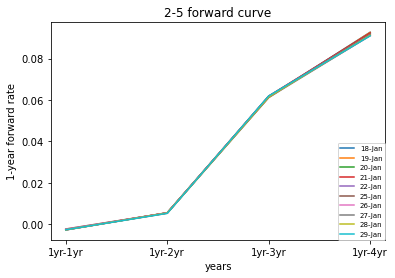

In [73]:
forward = []
for i in adjusted_spot:
    sub = []
    for j in range(1,5):
        func = lambda f : (1+i[2*j+1]/2)**(2*(j+1)) - ((1+i[2*j-1]/2)**(2*(j)))*((1+f/2)**(2))
        sub.append(optimize.newton(func, 0.0005))
    forward.append(sub)
forward
f_time = ['1yr-1yr', '1yr-2yr','1yr-3yr','1yr-4yr']
fig3 = plt.title('2-5 forward curve')
i = 0
for a in forward:
    plt.plot(f_time,a, label = date[i])
    i+= 1
plt.ylabel('1-year forward rate')
plt.xlabel('years')
plt.legend(loc='lower right', borderaxespad=0., fontsize = 7)

In [74]:
daily = np.transpose(adjusted_ytm)
lg_r = []
for i in range(1,6):
    sub = []
    y = daily[2*i - 1]
    for j in range(9):
        sub.append(np.log(y[j+1]/y[j]))
    lg_r.append(sub)
lg_r = np.array(lg_r)
lr_cov = np.cov(lg_r)   

In [75]:
f = np.transpose(forward)
f
fr = []
for i in range(4):
    sub = []
    y = f[i]
    for j in range(9):
        sub.append(np.log(y[j+1]/y[j]))
    fr.append(sub)
fr = np.array(fr)
fr_cov = np.cov(fr)     

In [76]:
w1, v1 = la.eig(lr_cov)
w2, v2 = la.eig(fr_cov)